In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
# import liste des mots vides
from nltk.corpus import stopwords
# import fonction pour télécharger des ensemble de données
from nltk import download
import seaborn as sns
#Utiliser pour le traitement du langage naturel
import spacy
# Pour le rééquilibrage des classes
from imblearn.over_sampling import RandomOverSampler
import string
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn import metrics

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt



In [ ]:

"""
Cette ligne charge le modèle de traitement du langage naturel pré-entraîné
en français.
Ce modèle contient des informations telles que des vecteurs de mots et des
règles de grammaire, qui sont utilisées pour analyser le texte en français.

"""
#utile pour télécharger les stopword
!python3 -m spacy download fr_core_news_sm
nlp=spacy.load('fr_core_news_sm')
download('stopwords')
stopWord=set(stopwords.words('french'))
print(stopWord)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 31.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
{'son', 'serait', 'des', 'avait', 'avez', 'pour', 'êtes', 'eux', 'notre', 'aies', 'à', 'serions', 'ou', 'se', 'eûmes', 'seras', 'j', 'ayant', 'tes', 'sa', 'eûtes', 'qu', 'seraient', 'ayantes', 'aient', 'serons', 'serais', 'soient', 'auras', 't', 'étées', 'mais', 'été', 'fusse', 'était', 'tu', 'aurions', 'avaient', 'soit', 'aux', 'fus', 'est', 'même', 'fusses', 'm', 'aurais', 'au', 'étant', 'étions', 'fussiez', 'je', 'ait', 'eurent', 'eusse', 'le', 'sera', 'eussent', 'ses', 'en', 'n', 'pas', 'eussiez', 'te', 'dans', 'toi', 'un', 'furent', 'avions', 'moi', 'seriez', 'sois', 'un

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Importer les données

In [ ]:
#Importer jeu d'entrainement
data_train = pd.read_csv('donnees/train.tsv',sep='\t')
data_train.info()
train = data_train[['headline','text','category']]

#Importer jeu de test
data_test= pd.read_csv('donnees/test.tsv',sep='\t')
test = data_test[['headline','text','category']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  1476 non-null   object
 1   headline  1476 non-null   object
 2   text      1476 non-null   object
 3   url       1476 non-null   object
dtypes: object(4)
memory usage: 46.2+ KB


# Pré-traitement des données

In [ ]:
def traitement_text(phrase):
    """
    Cette fonction prend en entrée une phrase et renvoie la phrase prétraitée.
    Args:
        phrase (str): La phrase à prétraiter.
    """
    #Tokenization: phrase diviser en mot
    doc = nlp(phrase)
    liste_doc=[] #stock les mots tokenisés
    result =[] #resultat final du mot
    for i in doc:
        #supprimer les mots vides et la ponctuation
        if i.text.lower() not in stopWord and (i.text not in string.punctuation):
            liste_doc.append(i)
    #Lemmatization: réduire les mots à leur forme de base
    for i in liste_doc:
        result.append(i.lemma_.lower())

    return " ".join(result)

In [ ]:
X = train.drop('category', axis=1) #Possède les colonnes 'headline' et 'text'
y = train['category'] #Possède la colonne 'category'

#Suréchantillonnage aléatoire des données
random_values = RandomOverSampler(random_state=1)

#Application des prétraitements des données
X.headline = X.headline.apply(traitement_text)
X.text = X.text.apply(traitement_text)

#Surécantillonnage aléatoire
X_resampled, y_resampled = random_values.fit_resample(X, y)

# Conversion des données suréchantillonnées en DataFrame
train = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='category')], axis=1)


In [ ]:
"""
Fonction sert de tokenizer pour vectoriseur TF-IDF
prend un texte et divise en mot avec un " "
"""
def transfomer_token(text):
    return text.split(' ')

#Liste mots vide et signe ponctuation

headline_stopWord=stopwords.words('french')+list(string.punctuation)

headline_vectoriser=TfidfVectorizer(tokenizer=transfomer_token,
                                    lowercase=True,
                                    stop_words=headline_stopWord,
                                    min_df=0.01)
#print(headline_stopWord[:10])

text_stopWord=stopwords.words('french')+list(string.punctuation)
text_vectoriser=TfidfVectorizer(tokenizer=transfomer_token,
                                    lowercase=True,
                                    stop_words=text_stopWord,
                                    min_df=0.01)
print(headline_stopWord[:10])


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']


headline_stopWord: specifier token à exclure lors de la vectorisation des headline


headline_vectoriser : transforme texte en une matrice de caractéristique

Pareil pour le texte

On définit une liste de mots vides pour les titres en combinant les mots vides français stopwords.words('french') et la ponctuation (string.punctuation).

On crée un objet TfidfVectorizer pour les titres en spécifiant :
tokenizer=transform_into_token_list : Utilise la fonction transform_into_token_list pour diviser les titres en mots.
lowercase=True : Convertit les mots en minuscules.
stop_words=title_stopwords : Utilise la liste de mots vides définie précédemment.
min_df=0.01 : Ignore les mots qui apparaissent dans moins de 1% des titres.

In [ ]:
# Source : https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer.html
"""
Fonction qui crée une liste de dictionnaires où
chaque dictionnaire contient des statisitques sur un texte
"""
def text_stats(descriptions):
    return [{"length": len(text), "num_sentences": text.count(".")}
            for text in descriptions]

text_stats_transformer = FunctionTransformer(text_stats)
text_stats_vectorizer = DictVectorizer(sparse=False)

Cette fonction prend en entrée une liste de descriptions de textes.
Elle retourne une liste de dictionnaires où chaque dictionnaire contient deux statistiques textuelles : la longueur du texte et le nombre de phrases.


On crée un transformateur text_stats_transformer en utilisant FunctionTransformer qui applique la fonction text_stats() définie précédemment.


On crée un vectoriseur text_stats_vectorizer en utilisant DictVectorizer pour convertir les dictionnaires de statistiques textuelles en représentation matricielle.

In [ ]:
#Exemple d'utilisation de text_stats_transformer sur les 5 premieres ligne de text
#Extraction des stat textuelles
res_dict = text_stats_transformer.transform(train.text.head())
#Vectorizer les stats
res_stats = text_stats_vectorizer.fit_transform(res_dict)
print("Input descriptions")
print(train.text.head())
print("\n")
print("Output statistics")
stats = pd.DataFrame(res_stats, columns=text_stats_vectorizer.get_feature_names_out())
print(stats)


Input descriptions
0    le ouganda placer 79 classement fifa 4 avril 2...
1    responsable biodiversité nation uni estime nég...
2    sélectionneur sierra leone john keister affirm...
3    depuis plus six siècle vaste zone situer ville...
4    pendant pandémie coronavirus richesse combiner...
Name: text, dtype: object


Output statistics
   length  num_sentences
0  1758.0            0.0
1  2877.0            1.0
2  1298.0            0.0
3  3670.0            0.0
4  3033.0            7.0


On applique le transformateur text_stats_transformer sur les cinq premiers synopsis de données d'entraînement pour obtenir les statistiques textuelles sous forme de dictionnaires.
On utilise le vectoriseur text_stats_vectorizer pour convertir ces dictionnaires en une représentation matricielle.

In [ ]:
# Redimensionne en les normalisant
min_max_scaler = MinMaxScaler()
#Version normalisée de res_stats
scaled_stats = min_max_scaler.fit_transform(res_stats)

print("Before MinMax scaling")
print(res_stats)
print()
print("After MinMax scaling")
print(scaled_stats)

Before MinMax scaling
[[1.758e+03 0.000e+00]
 [2.877e+03 1.000e+00]
 [1.298e+03 0.000e+00]
 [3.670e+03 0.000e+00]
 [3.033e+03 7.000e+00]]

After MinMax scaling
[[0.19392917 0.        ]
 [0.66568297 0.14285714]
 [0.         0.        ]
 [1.         0.        ]
 [0.73145025 1.        ]]


MinMaxScaler est utilisé pour mettre à l'échelle les caractéristiques dans une plage spécifiée. Cette mise à l'échelle est souvent utilisée dans le prétraitement des données pour normaliser les caractéristiques.

## Chaine de pré-traitement complète

Le pipeline est utilisé pour combiner plusieurs étapes de pré-traitement (extraction de statistiques textuelles, vectorisation et mise à l'échelle) en une seule étape.

Chaque colonne est traité de maniere independante, ce qui permet une flexibilité des données





In [ ]:
column_trans = ColumnTransformer(
     [
         # headline-tfidf
         ('headline_tfidf', headline_vectoriser, 'headline'),
         # text tfidf
         ('text_tfidf', text_vectoriser, 'text'),
         # Colonne 'text' : statistiques
         (
             'text_stats',
             Pipeline(
                 [
                     ('text_stats', text_stats_transformer),
                     ('vect', text_stats_vectorizer),
                     ('scaling', min_max_scaler)
                 ]
             ),
             'text'
         )
     ],
     # autres
     remainder='passthrough'
 )

Ce transformateur de colonnes applique différentes transformations sur différentes colonnes du jeu de données, y compris la vectorisation TF-IDF pour les headlines et les text, ainsi que l'extraction et la mise à l'échelle des sta

**'headline_tfidf', headline_vectoriser, 'headline'**: Applique le headline_vectoriser (TfidfVectorizer) à la colonne headline. Cela transforme le texte des titres en une matrice TF-IDF, extrayant l'importance relative des mots dans les titres.

**'text_tfidf', text_vectoriser, 'text'**: Pareil que headline mais appliqué à la colonne text.

**'text_stats', Pipeline([...]), 'text':** Applique une Pipeline à la colonne text qui exécute plusieurs étapes de transformation:

- **'text_stats', text_stats_transformer**:
Utilise text_stats_transformer pour calculer des statistiques de base sur le texte, comme la longueur du texte et le nombre de phrases.
- **'vect', text_stats_vectorizer**: Transforme les dictionnaires de statistiques produits par text_stats_transformer en une matrice numérique utilisant text_stats_vectorizer (DictVectorizer).
- **'scaling', min_max_scaler**: Normalise les caractéristiques numériques obtenues dans l'étape précédente en utilisant min_max_scaler, garantissant que toutes les caractéristiques statistiques sont à la même échelle.

**remainder**: specifie que toute les colonnes non changé par 'ColumnTransformer' doiventre resté inchangées.

In [ ]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('headline_tfidf',
                                 TfidfVectorizer(min_df=0.01,
                                                 stop_words=['au', 'aux',
                                                             'avec', 'ce',
                                                             'ces', 'dans',
                                                             'de', 'des', 'du',
                                                             'elle', 'en', 'et',
                                                             'eux', 'il', 'ils',
                                                             'je', 'la', 'le',
                                                             'les', 'leur',
                                                             'lui', 'ma',
                                                             'mais', 'me',
                                                             'même', 'mes',
                                                             'moi', 'mon', 'ne',
                                                             'nos', ...],
                                                 tokenizer=<function transfomer_token at 0x7d6b1f704af0>),
                                 'hea...
                                                             'eux', 'il', 'ils',
                                                             'je', 'la', 'le',
                                                             'les', 'leur',
                                                             'lui', 'ma',
                                                             'mais', 'me',
                                                             'même', 'mes',
                                                             'moi', 'mon', 'ne',
                                                             'nos', ...],
                                                 tokenizer=<function transfomer_token at 0x7d6b1f704af0>),
                                 'text'),
                                ('text_stats',
                                 Pipeline(steps=[('text_stats',
                                                  FunctionTransformer(func=<function text_stats at 0x7d6b1f7040d0>)),
                                                 ('vect',
                                                  DictVectorizer(sparse=False)),
                                                 ('scaling', MinMaxScaler())]),
                                 'text')])

# Création du jeu d'entrainement et de test

In [ ]:
#Diviser notre ensemble en un ensemble d'entraînement et un ensemble de test
#test_size : la taille de l'ensemble de test
#shuffle: mélanger les données avant de diviser les données
X_train, X_val, y_train, y_val = train_test_split(train[['headline', 'text']],
                                                    train[['category']],
                                                    test_size=0.2,
                                                    random_state=12,
                                                    shuffle=True)

## Apprentissage avec pipeline


In [ ]:
"""
Fonction qui permet de créer une pipeline en connectant automatiquement
 une série de transformateurs et un estimateur final
"""
# Prétraitement + apprentissage
classifier_pipeline = make_pipeline(
    # Préparation des données pour l'apprentissage
    column_trans,
    # Algorithme d'apprentissage
    LogisticRegression()
)

column_trans : c'est le columnTransformer de tout à l'heure

logisitcRegression: estimateur de classification choisi pour l'apprentissage

In [ ]:
classifier_pipeline.fit(X_train, y_train.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('headline_tfidf',
                                                  TfidfVectorizer(min_df=0.01,
                                                                  stop_words=['au',
                                                                              'aux',
                                                                              'avec',
                                                                              'ce',
                                                                              'ces',
                                                                              'dans',
                                                                              'de',
                                                                              'des',
                                                                              'du',
                                                                              'elle',
                                                                              'en',
                                                                              'et',
                                                                              'eux',
                                                                              'il',
                                                                              'ils',
                                                                              'je',
                                                                              'la',
                                                                              'le',
                                                                              'les',
                                                                              'leur',
                                                                              'lui',
                                                                              'ma',
                                                                              'mais',
                                                                              'me',
                                                                              'même',
                                                                              'mes',
                                                                              'moi',
                                                                              'mon',
                                                                              'ne',
                                                                              'nos', ...],
                                                                  tokenizer=<function tr...
                                                                              'ma',
                                                                              'mais',
                                                                              'me',
                                                                              'même',
                                                                              'mes',
                                                                              'moi',
                                                                              'mon',
                                                                              'ne',
                                                                              'nos', ...],
                                                                  tokenizer=<function transfomer_token at 0x7d6b1f704af0>),
                                                  'text'),
                                                 ('text_stats',
                                                  Pipeline(steps=[('text_stats',
                

Utilisé pour ajuster les données d'apprentissage

Évaluation du modèle sur les données de test

In [ ]:
y_pred = classifier_pipeline.predict(X_val)
print("Classification report:\n\n{}".format(classification_report(y_val, y_pred)))

Classification report:

              precision    recall  f1-score   support

    business       0.80      0.75      0.77        75
      health       0.90      0.88      0.89        74
    politics       0.81      0.82      0.81        71
      sports       0.93      0.93      0.93        58
  technology       0.88      0.96      0.92        72

    accuracy                           0.86       350
   macro avg       0.86      0.87      0.87       350
weighted avg       0.86      0.86      0.86       350



Utilisé pour faire des prédicitons

## Analyse des résultats à l'aide des matrices de confusion

In [ ]:
# Liste des labels (classes) se trouvant dans les données de test
labels = np.unique(y_val)
# Matrice de confusion
cm =  confusion_matrix(y_val, y_pred, labels=labels)
# Matrice de confusion sous forme de DataFrame
confusion_df = pd.DataFrame(cm, index=labels, columns=labels)
print('confusion matrix\n')
print('(row=expected, col=predicted)')
confusion_df.head(n=15)

confusion matrix

(row=expected, col=predicted)


,business,health,politics,sports,technology
business,56,4,12,0,3
health,5,65,2,1,1
politics,8,1,58,0,4
sports,1,2,0,54,1
technology,0,0,0,3,69


## Affichage en couleur avec nom des clases


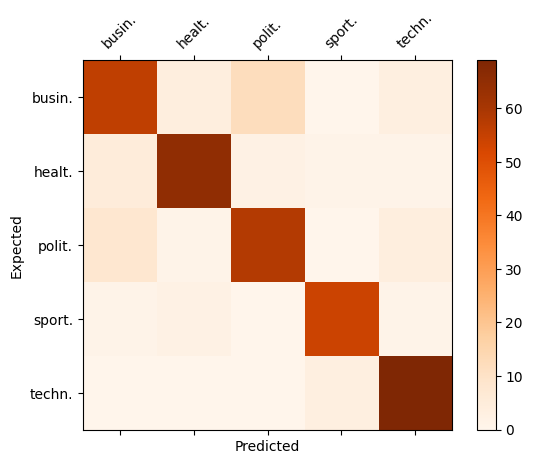

In [ ]:
# plt.matshow(confusion_matrix(y_val, y_pred),
#             cmap=plt.cm.binary, interpolation='nearest')
# plt.title('confusion matrix')
# plt.colorbar()
# plt.ylabel('expected label')
# plt.xlabel('predicted label')

# Source : https://intellipaat.com/community/1611/sklearn-plot-confusion-matrix-with-labels
# http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
fig.colorbar(cax)
tick_marks = np.arange(len(labels))
labels_for_fig = [l[0:5]+'.' for l in labels]
plt.xticks(tick_marks, labels_for_fig, rotation=45)
plt.yticks(tick_marks, labels_for_fig)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Utilise StratifedKFold : utile pour garantir que les données sont bien réparties, en particulier lorsque les classes ne sont pas équilibrées.

# Apprentissage par plis

In [ ]:
# Nombre de plis
folds = 5
#Découpage en plis
stratkfold = model_selection.StratifiedKFold(n_splits=folds, shuffle=True, random_state=12)
#Apprentissage avec validation croisée
y_stratkfold_pred = model_selection.cross_val_predict(classifier_pipeline, X_train, y_train.values.flatten(), cv=stratkfold, n_jobs=-1)


print(classification_report(y_train, y_stratkfold_pred))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


              precision    recall  f1-score   support

    business       0.77      0.80      0.79       275
      health       0.87      0.86      0.87       276
    politics       0.85      0.88      0.86       279
      sports       0.95      0.91      0.93       292
  technology       0.92      0.92      0.92       278

    accuracy                           0.87      1400
   macro avg       0.87      0.87      0.87      1400
weighted avg       0.88      0.87      0.87      1400



Ce code utilise la validation croisée stratifiée pour évaluer les performances d'un modèle de classification. Il divise les données d'entraînement en 5 plis, entraîne le modèle sur 4 plis et le teste sur le pli restant, répétant cette opération 5 fois. Ensuite, il prédit les étiquettes cibles pour chaque échantillon en utilisant la validation croisée stratifiée.

# Comparaison de plusieurs classifieurs

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Baseline
              precision    recall  f1-score   support

    business       0.00      0.00      0.00       275
      health       0.00      0.00      0.00       276
    politics       0.00      0.00      0.00       279
      sports       0.21      1.00      0.35       292
  technology       0.00      0.00      0.00       278

    accuracy                           0.21      1400
   macro avg       0.04      0.20      0.07      1400
weighted avg       0.04      0.21      0.07      1400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extracti

Mutinomial NB
              precision    recall  f1-score   support

    business       0.86      0.68      0.76       275
      health       0.83      0.92      0.87       276
    politics       0.81      0.90      0.85       279
      sports       0.86      0.92      0.89       292
  technology       0.87      0.79      0.83       278

    accuracy                           0.84      1400
   macro avg       0.85      0.84      0.84      1400
weighted avg       0.85      0.84      0.84      1400



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CART
              precision    recall  f1-score   support

    business       0.58      0.54      0.56       275
      health       0.76      0.75      0.76       276
    politics       0.67      0.69      0.68       279
      sports       0.85      0.80      0.82       292
  technology       0.85      0.95      0.90       278

    accuracy                           0.75      1400
   macro avg       0.74      0.75      0.74      1400
weighted avg       0.74      0.75      0.75      1400



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


LR
              precision    recall  f1-score   support

    business       0.77      0.80      0.79       275
      health       0.87      0.86      0.87       276
    politics       0.85      0.88      0.86       279
      sports       0.95      0.91      0.93       292
  technology       0.92      0.92      0.92       278

    accuracy                           0.87      1400
   macro avg       0.87      0.87      0.87      1400
weighted avg       0.88      0.87      0.87      1400



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KNN
              precision    recall  f1-score   support

    business       0.57      0.50      0.54       275
      health       0.66      0.70      0.68       276
    politics       0.70      0.73      0.71       279
      sports       0.82      0.68      0.74       292
  technology       0.67      0.80      0.73       278

    accuracy                           0.68      1400
   macro avg       0.68      0.68      0.68      1400
weighted avg       0.68      0.68      0.68      1400



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Random forest
              precision    recall  f1-score   support

    business       0.73      0.75      0.74       275
      health       0.90      0.87      0.88       276
    politics       0.83      0.85      0.84       279
      sports       0.94      0.92      0.93       292
  technology       0.97      0.97      0.97       278

    accuracy                           0.87      1400
   macro avg       0.87      0.87      0.87      1400
weighted avg       0.88      0.87      0.87      1400



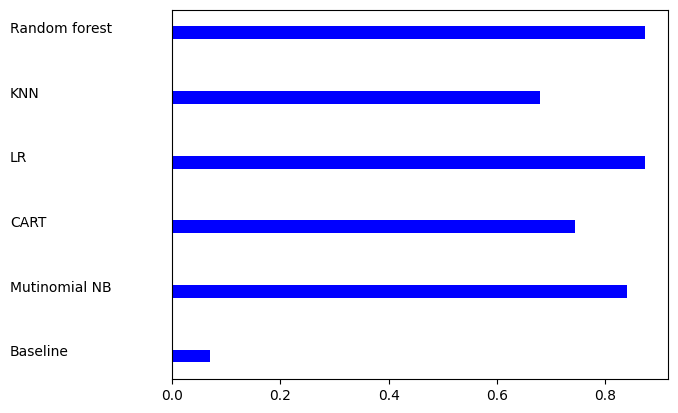

In [ ]:
# Modèles à comparer
"""
Fonction permet une comparaison directe de plusieurs classification sur
le même jeu de données.
"""

models = [
    ('Baseline', DummyClassifier(strategy='most_frequent')),
    ('Mutinomial NB', MultinomialNB()),
    ('CART', DecisionTreeClassifier()),
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Random forest', RandomForestClassifier())
]
# Evaluation de chaque résultat l'un après l'autre
scores = []
names = []
scoring = 'macro F1'
# Validation croisée à 5 plis
kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
# Itération sur les modèles
for name, model in models:
    # Ajout du nom du modèle à la liste name
    names.append(name)
    # Création de la pipeline pour le modèle
    model_pipeline = make_pipeline(column_trans, model)
    # Validation croisée
    y_pred = model_selection.cross_val_predict(model_pipeline,
                                               X_train, y_train.values.flatten(),
                                               cv=kfold)
    print(name)
    print(classification_report(y_train, y_pred))
    f1 = f1_score(y_train, y_pred, average='macro')
    scores.append(f1)

# Représentation graphique des résultats
indices = np.arange(len(scores))
fig = plt.figure()
plt.barh(indices, scores, .2, label="score", color='b')
plt.yticks(())
for i, c in zip(indices, names):
    plt.text(-.3, i, c)
plt.show()

Cela aide à identifier quel modèle performe le mieux en
fonction du score F1 macro, facilitant ainsi la sélection du modèle le plus approprié pour
les besoins spécifiques de l'application. Cette approche est cruciale pour une évaluation
équitable des modèles, car elle utilise la même méthode de validation et les mêmes données
 pour chaque modèle.

# Entrainement du meilleur modèle

In [ ]:
model_pipeline =make_pipeline(column_trans, LogisticRegression())
model_pipeline.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('headline_tfidf',
                                                  TfidfVectorizer(min_df=0.01,
                                                                  stop_words=['au',
                                                                              'aux',
                                                                              'avec',
                                                                              'ce',
                                                                              'ces',
                                                                              'dans',
                                                                              'de',
                                                                              'des',
                                                                              'du',
                                                                              'elle',
                                                                              'en',
                                                                              'et',
                                                                              'eux',
                                                                              'il',
                                                                              'ils',
                                                                              'je',
                                                                              'la',
                                                                              'le',
                                                                              'les',
                                                                              'leur',
                                                                              'lui',
                                                                              'ma',
                                                                              'mais',
                                                                              'me',
                                                                              'même',
                                                                              'mes',
                                                                              'moi',
                                                                              'mon',
                                                                              'ne',
                                                                              'nos', ...],
                                                                  tokenizer=<function tr...
                                                                              'ma',
                                                                              'mais',
                                                                              'me',
                                                                              'même',
                                                                              'mes',
                                                                              'moi',
                                                                              'mon',
                                                                              'ne',
                                                                              'nos', ...],
                                                                  tokenizer=<function transfomer_token at 0x7d6b1f704af0>),
                                                  'text'),
                                                 ('text_stats',
                                                  Pipeline(steps=[('text_stats',
                

# Tester le modèle

In [ ]:
nom_categorie = sorted(train.category.unique().flatten())
y_pred = model_pipeline.predict(X_val)

print("Test Accuracy: {:.2f}".format(100 * metrics.accuracy_score(y_val, y_pred)))
print("Test F1-Score: {:.2f}".format(100 * metrics.f1_score(y_val, y_pred, average='macro')))
print()

report = metrics.classification_report(
    y_val, y_pred,
    target_names=nom_categorie
)
print(report)

Test Accuracy: 91.14
Test F1-Score: 90.94

              precision    recall  f1-score   support

    business       0.89      0.93      0.91        75
      health       0.95      0.96      0.95        74
    politics       0.87      0.97      0.92        71
      sports       0.88      1.00      0.94        58
  technology       1.00      0.71      0.83        72

    accuracy                           0.91       350
   macro avg       0.92      0.91      0.91       350
weighted avg       0.92      0.91      0.91       350

